In [3]:
import pandas as pd
from matplotlib.patches import Circle, Rectangle, Arc
import matplotlib.pyplot as plt
from func.draw import draw_court

In [ ]:
# read_file = pd.read_excel (r'NBA-PbP-Sample-Dataset.xlsx')
# read_file.to_csv (r'NBA-PbP-Sample-Dataset.csv', index = None, header=True)

In [4]:
logpath = "data/NBA-PbP-Sample-Dataset.csv"
log_df = pd.read_csv(logpath)
print(log_df.event_type.unique())

['Various types of events (fouls, freethrows, turnovers etc.)'
 'start of period' 'jump ball' 'shot' 'rebound' 'turnover' 'foul'
 'free throw' 'timeout' 'substitution' 'end of period' 'violation' nan]


In [5]:
shots_df = log_df[(log_df.event_type == 'shot')]
print(shots_df)

      game_id          data_set              date             a1  \
3    42000406  2020-21 Playoffs  20/07/2021 00:00  Deandre Ayton   
5    42000406  2020-21 Playoffs  20/07/2021 00:00  Deandre Ayton   
7    42000406  2020-21 Playoffs  20/07/2021 00:00  Deandre Ayton   
9    42000406  2020-21 Playoffs  20/07/2021 00:00  Deandre Ayton   
10   42000406  2020-21 Playoffs  20/07/2021 00:00  Deandre Ayton   
..        ...               ...               ...            ...   
439  42000406  2020-21 Playoffs  20/07/2021 00:00    Jae Crowder   
442  42000406  2020-21 Playoffs  20/07/2021 00:00    Jae Crowder   
447  42000406  2020-21 Playoffs  20/07/2021 00:00    Jae Crowder   
455  42000406  2020-21 Playoffs  20/07/2021 00:00    Jae Crowder   
461  42000406  2020-21 Playoffs  20/07/2021 00:00    Jae Crowder   

               a2             a3           a4             a5  \
3    Devin Booker     Chris Paul  Jae Crowder  Mikal Bridges   
5    Devin Booker     Chris Paul  Jae Crowder  Mikal Br

In [6]:
shots_df['shot_made'] = 0
shots_df['shot_made'] = shots_df['shot_made'].mask(shots_df.result == 'made', 1)

/var/folders/2x/ykl_f8413pz0skwc6dchpgxc0000gn/T/ipykernel_8891/1988558964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['shot_made'] = 0
/var/folders/2x/ykl_f8413pz0skwc6dchpgxc0000gn/T/ipykernel_8891/1988558964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['shot_made'] = shots_df['shot_made'].mask(shots_df.result == 'made', 1)


In [7]:
print(shots_df['shot_made'])

3      0
5      0
7      0
9      1
10     1
      ..
439    1
442    0
447    0
455    1
461    0
Name: shot_made, Length: 168, dtype: int64


In [8]:
shots_df['original_x'] = pd.to_numeric(shots_df['original_x'])
shots_df['original_y'] = pd.to_numeric(shots_df['original_y'])


/var/folders/2x/ykl_f8413pz0skwc6dchpgxc0000gn/T/ipykernel_8891/1725952660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['original_x'] = pd.to_numeric(shots_df['original_x'])
/var/folders/2x/ykl_f8413pz0skwc6dchpgxc0000gn/T/ipykernel_8891/1725952660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['original_y'] = pd.to_numeric(shots_df['original_y'])


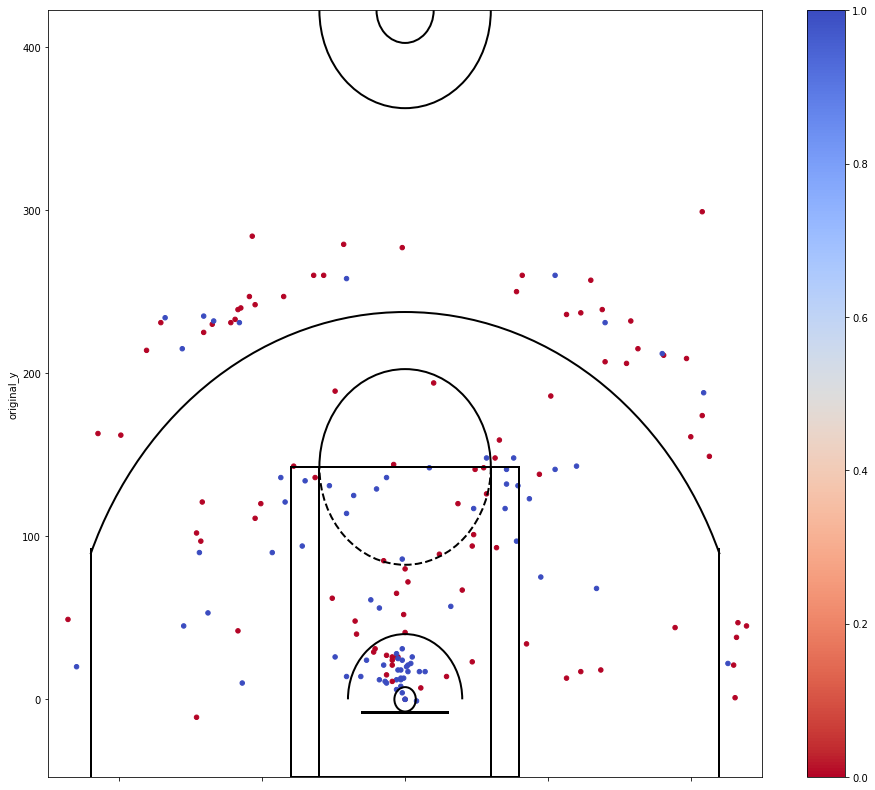

In [20]:

shots_df.plot.scatter('original_x', 'original_y', figsize=(8*2, 4.7*3),sort_columns = True,c=shots_df.shot_made, cmap='coolwarm_r')
draw_court(outer_lines=False)
cur_axes = plt.gca()
plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.show()



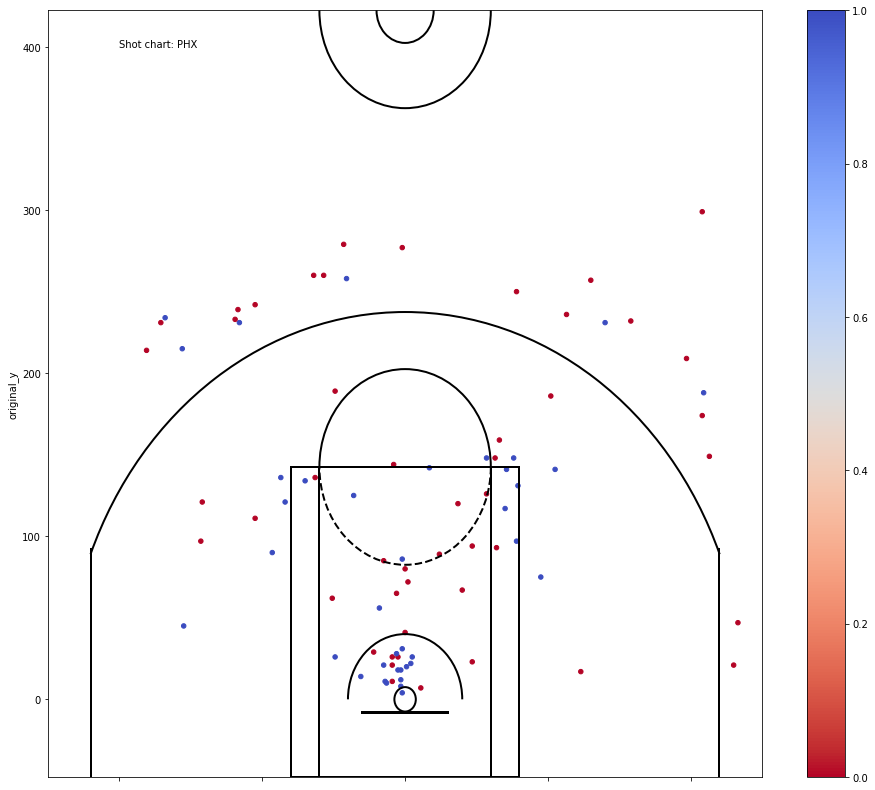

In [27]:
#PHX SHOT CHART
PHX_shots_df = shots_df[shots_df.team == 'PHX']
PHX_shots_df.plot.scatter('original_x', 'original_y', figsize=(8*2, 4.7*3),sort_columns = True,c=PHX_shots_df.shot_made, cmap='coolwarm_r')
draw_court(outer_lines=False)
cur_axes = plt.gca()
plt.text(200,400, 'Shot chart: PHX')

plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.show()



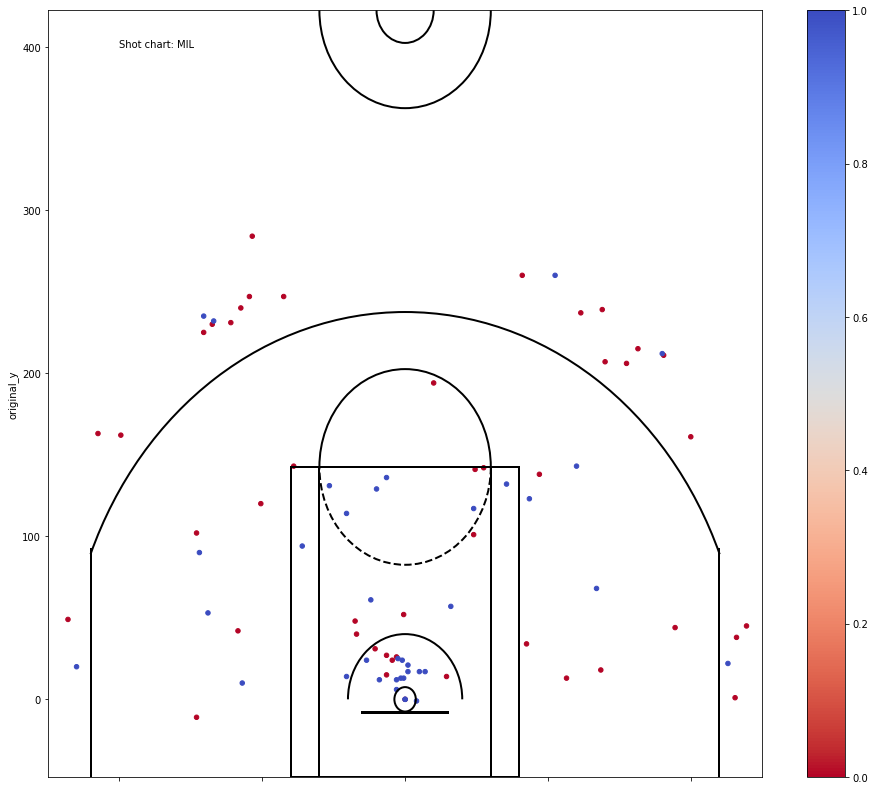

In [29]:
#MIL SHOT CHART
MIL_shots_df = shots_df[shots_df.team == 'MIL']
MIL_shots_df.plot.scatter('original_x', 'original_y', figsize=(8*2, 4.7*3),sort_columns = True,c=MIL_shots_df.shot_made, cmap='coolwarm_r')
draw_court(outer_lines=False)
cur_axes = plt.gca()
plt.text(200,400, 'Shot chart: MIL')

plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.show()

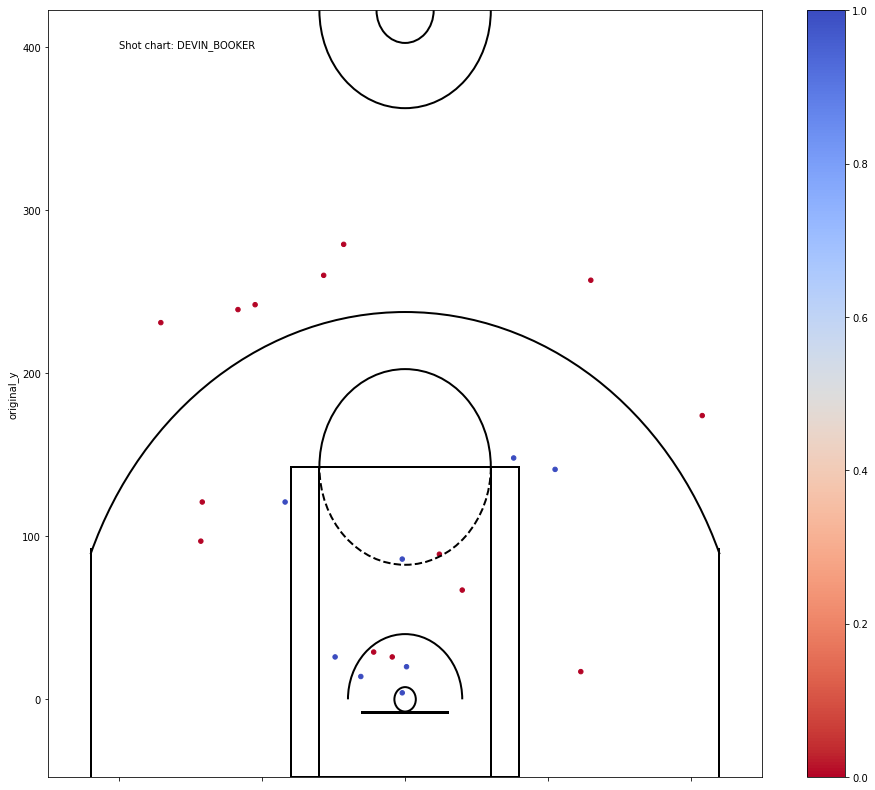

In [30]:
DEVIN_BOOKER_shots_df = shots_df[(shots_df.player == 'Devin Booker')]
DEVIN_BOOKER_shots_df.plot.scatter('original_x', 'original_y', figsize=(8*2, 4.7*3),sort_columns = True,c=DEVIN_BOOKER_shots_df.shot_made, cmap='coolwarm_r')
draw_court(outer_lines=False)
cur_axes = plt.gca()
plt.text(200,400, 'Shot chart: DEVIN_BOOKER')

plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.show()

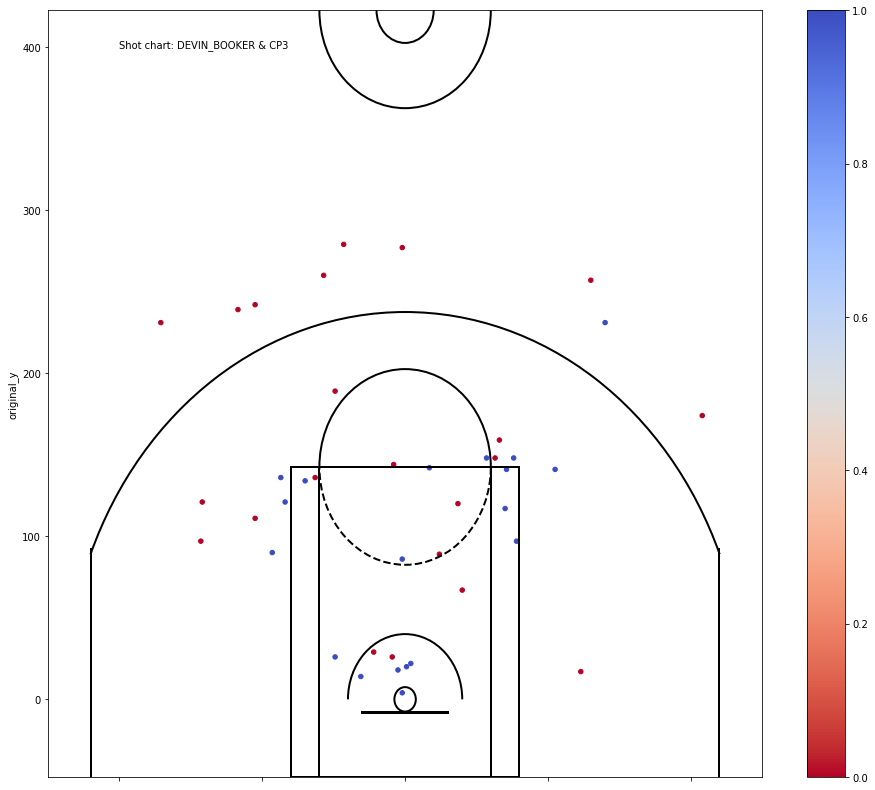

In [32]:
DEVIN_BOOKER_CP3_shots_df = shots_df[(shots_df.player == 'Devin Booker')|(shots_df.player == 'Chris Paul')]
DEVIN_BOOKER_CP3_shots_df.plot.scatter('original_x', 'original_y', figsize=(8*2, 4.7*3),sort_columns = True,c=DEVIN_BOOKER_CP3_shots_df.shot_made, cmap='coolwarm_r')
draw_court(outer_lines=False)
cur_axes = plt.gca()
plt.text(200,400, 'Shot chart: DEVIN_BOOKER & CP3')

plt.xlim(250, -250)
plt.ylim(-47.5, 422.5)
plt.show()